# Importing necessary Libraries and Data

In [1]:
!pip install lazypredict

     |████████████████████████████████| 14.5 MB 4.5 MB/s 
     |████████████████████████████████| 25.9 MB 1.8 MB/s 
     |████████████████████████████████| 269 kB 8.5 MB/s 
     |████████████████████████████████| 6.8 MB 31.1 MB/s 
     |████████████████████████████████| 248 kB 47.4 MB/s 
     |████████████████████████████████| 1.2 MB 41.6 MB/s 
     |████████████████████████████████| 72 kB 648 kB/s 
     |████████████████████████████████| 127.6 MB 16 kB/s 
     |████████████████████████████████| 302 kB 36.7 MB/s 
     |████████████████████████████████| 10.1 MB 42.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=0b88ea5b0d2b0f935e327d4016fe6bf9c7681734083f8adc210f84d607c74be2
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully un

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data=pd.read_csv('/content/drive/MyDrive/DS3_C6_S2_Classification_BankChurn_Data_Project.csv')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Understanding the data

In [3]:
df=data.copy()
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [4]:
df.shape

(10000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df[df.isnull().any(axis=1)].shape[0]

0

In [7]:
df.nunique()

CreditScore         460
Geography            11
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

- The data consists of 10000 instances and 11 features (2 have been removed - CustomerId and Surname).
- No Null values are present.
- 2 features are of string data type while other 9 are of numerical type (7 of int and 2 of float).

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Exited,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'espanio', 'fra', 'Germany', 'france', 'ger',
       'spain', 'germany', 'gernamy', 'GERMANY'], dtype=object)

A single country name has been  written in different ways which would affect our analysis.

In [10]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

# Data Cleaning

Replacing the country names in proper manner.

In [11]:
df['Geography'].replace(to_replace='espanio',value='Spain',inplace=True)
df['Geography'].replace(to_replace='fra',value='France',inplace=True)
df['Geography'].replace(to_replace='france',value='France',inplace=True)
df['Geography'].replace(to_replace='ger',value='Germany',inplace=True)
df['Geography'].replace(to_replace='spain',value='Spain',inplace=True)
df['Geography'].replace(to_replace='germany',value='Germany',inplace=True)
df['Geography'].replace(to_replace='gernamy',value='Germany',inplace=True)
df['Geography'].replace(to_replace='GERMANY',value='Germany',inplace=True)

In [12]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# Exploratory Data Analysis

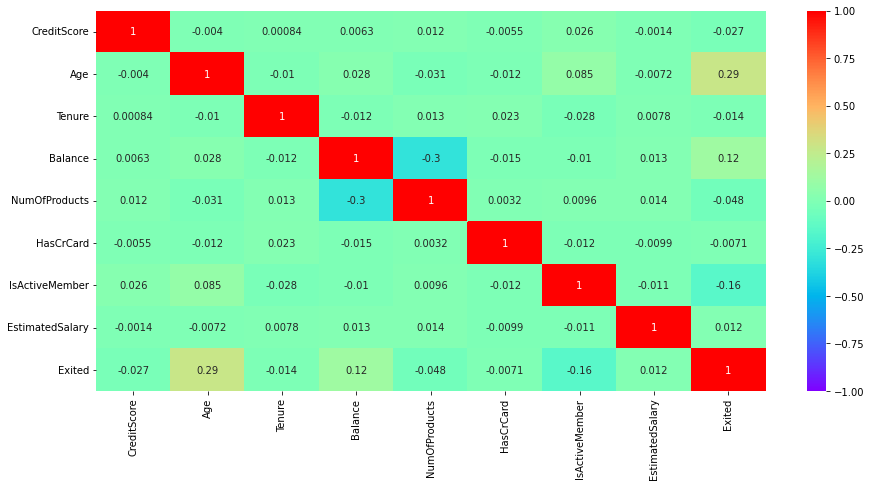

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='rainbow',annot=True,vmin=-1,vmax=1);

There are no columns in the data that have high correlation with any other feature (especially Exited), indicating that it would difficult for us to manually figure out what factors affect the churning rate.

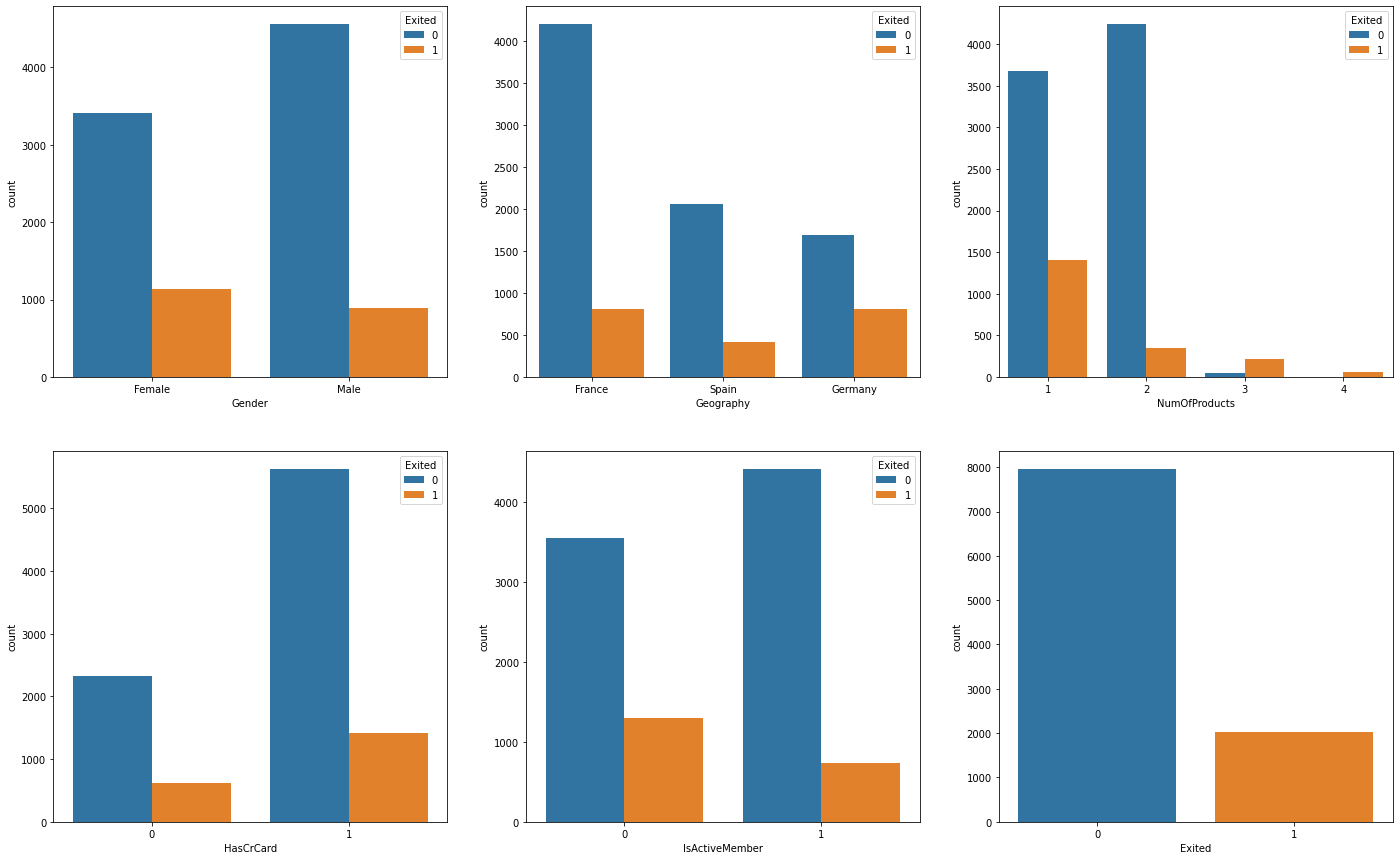

In [14]:
plt.subplots(2,3,figsize=(24,15))
plt.subplot(2,3,1)
sns.countplot(df['Gender'],hue=df['Exited'])
plt.subplot(2,3,2)
sns.countplot(df['Geography'],hue=df['Exited'])
plt.subplot(2,3,3)
sns.countplot(df['NumOfProducts'],hue=df['Exited'])
plt.subplot(2,3,4)
sns.countplot(df['HasCrCard'],hue=df['Exited'])
plt.subplot(2,3,5)
sns.countplot(df['IsActiveMember'],hue=df['Exited'])
plt.subplot(2,3,6)
sns.countplot(df['Exited']);

- Females have a bit higher ratio of churning than males.
- Germany has the highest churning rate.
- Customers with 2 products are less likely to leave the bank.
- Being an active member, customers have less chance or churning.

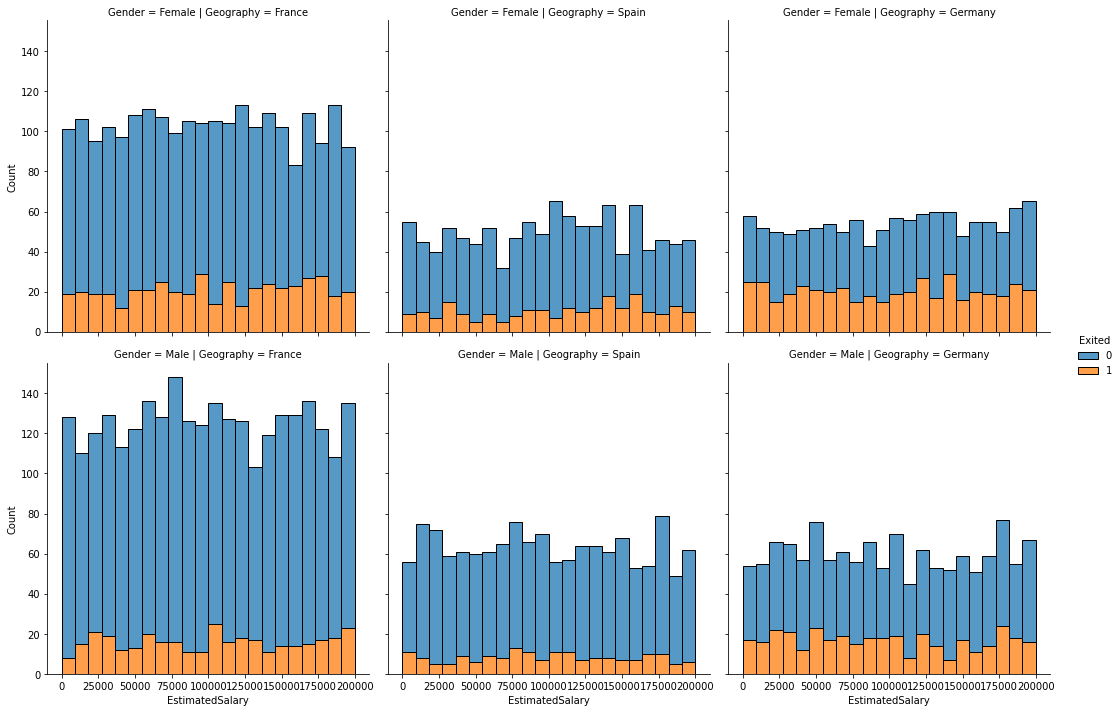

In [15]:
sns.displot(x=df['EstimatedSalary'],hue=df['Exited'],row=df['Gender'],col=df['Geography'],kind='hist',multiple='stack');

Salary does not seem to have major effect on churning of customers 

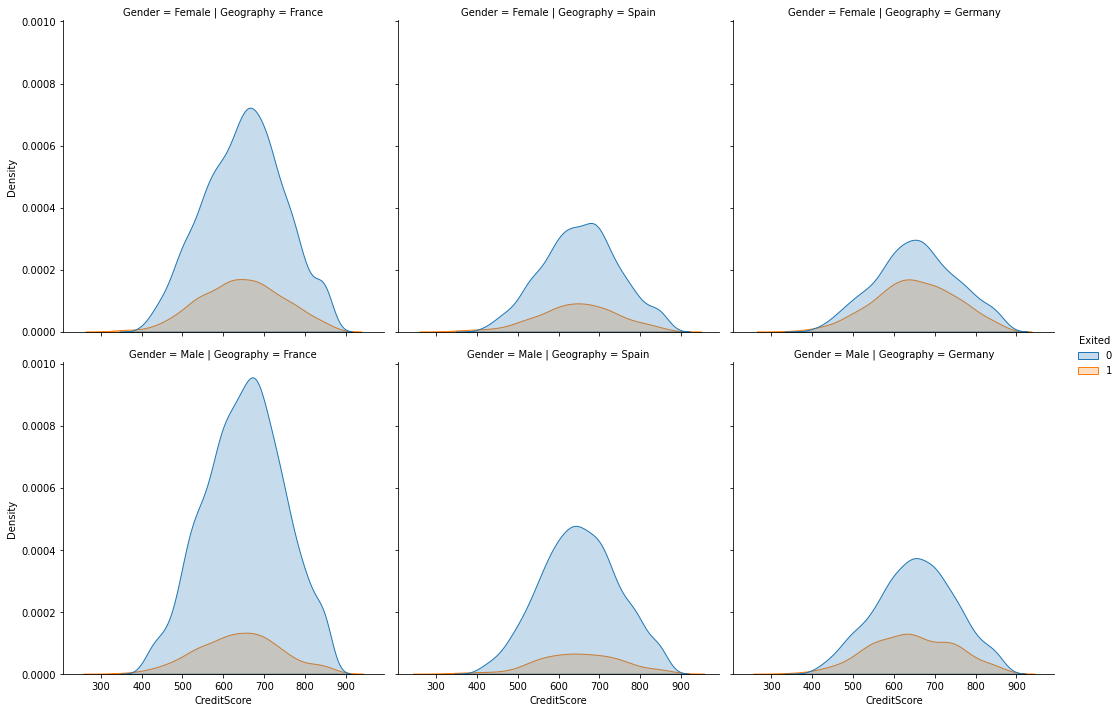

In [16]:
sns.displot(x=df['CreditScore'],hue=df['Exited'],row=df['Gender'],col=df['Geography'],kind='kde',fill=True);

- Credit Scores are almost normally distributed for all customers, indicating customers with high and low credit scores are less proabable to leave tha custoemrs with average credit score.
- Churning Rate is extremely high in Germany especially of women.

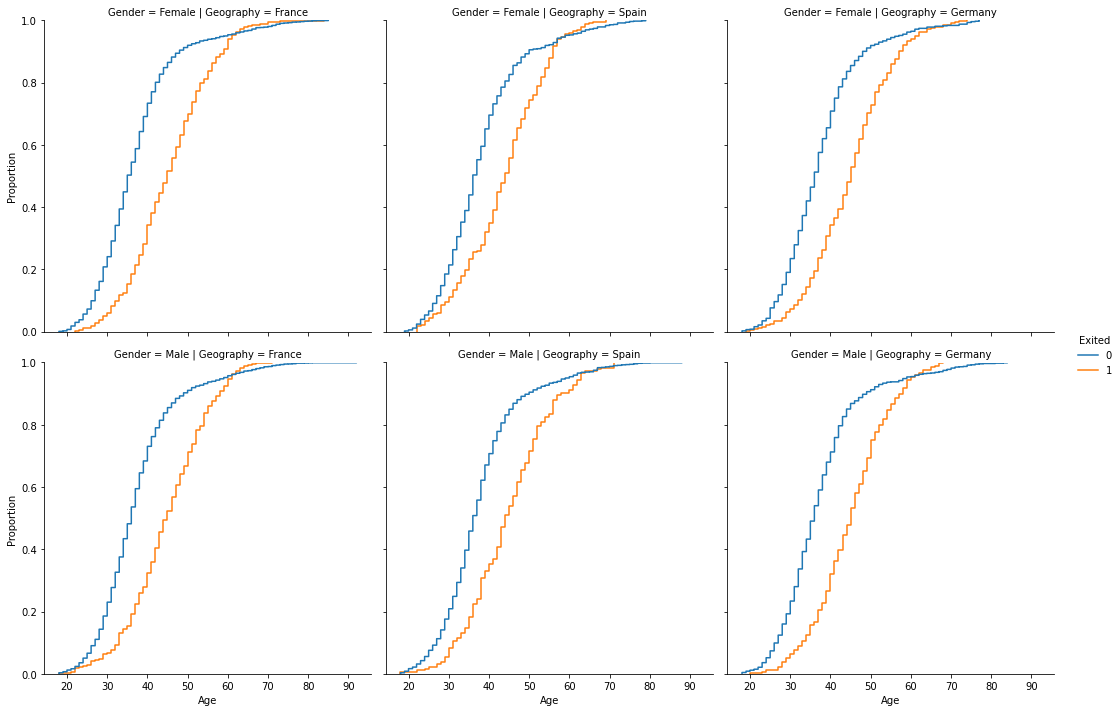

In [17]:
sns.displot(x=df['Age'],hue=df['Exited'],row=df['Gender'],col=df['Geography'],kind='ecdf');

There is definite difference in age pattern of churned and existing customers.

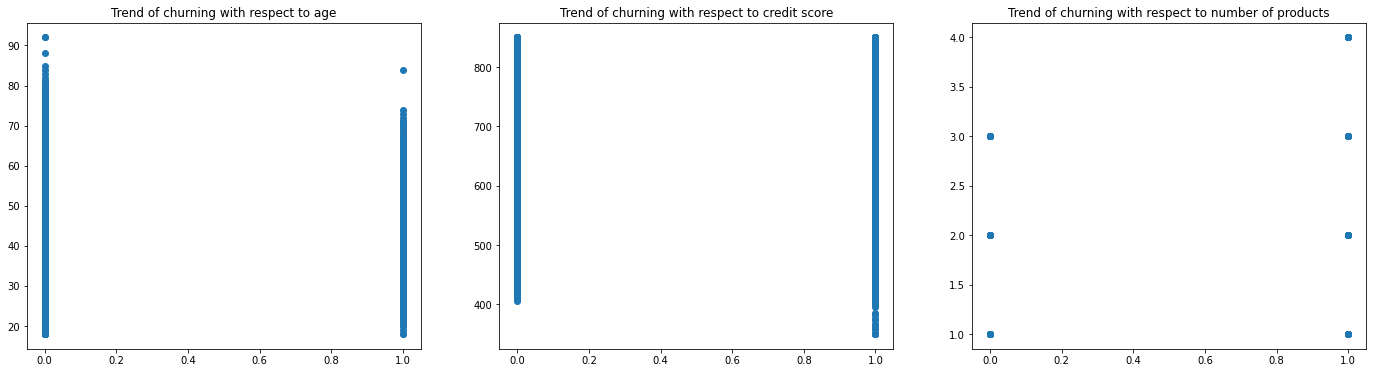

In [18]:
plt.subplots(1,3,figsize=(24,6))
plt.subplot(1,3,1)
plt.scatter(x=df['Exited'],y=df['Age'])
plt.title('Trend of churning with respect to age')
plt.subplot(1,3,2)
plt.scatter(x=df['Exited'],y=df['CreditScore'])
plt.title('Trend of churning with respect to credit score')
plt.subplot(1,3,3)
plt.scatter(x=df['Exited'],y=df['NumOfProducts'])
plt.title('Trend of churning with respect to number of products')
plt.show()

**Since different columns are difficult to interpret and have different effects on the churning rate, we do not manually select the features for modelling. Final model will be selected in a manner that weighs out the important features over the less effective ones.**

# Data Preparation

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
columns=['CreditScore','Age','Balance','EstimatedSalary','Tenure','NumOfProducts']
df[columns]=pr.MinMaxScaler().fit_transform(df[columns])

In [21]:
df=pd.get_dummies(df)

In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.54,0.32,0.20,0.00,0.00,1,1,0.51,1,1,0,0,1,0
1,0.52,0.31,0.10,0.33,0.00,0,1,0.56,0,0,0,1,1,0
2,0.30,0.32,0.80,0.64,0.67,1,0,0.57,1,1,0,0,1,0
3,0.70,0.28,0.10,0.00,0.33,0,0,0.47,0,1,0,0,1,0
4,1.00,0.34,0.20,0.50,0.00,1,1,0.40,0,0,0,1,1,0


In [23]:
df.dtypes

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [24]:
print('Data before preparation : ',data.shape)
print('Data after preparation for modelling : ',df.shape)

Data before preparation :  (10000, 13)
Data after preparation for modelling :  (10000, 14)


**Data has been scaled and labels have been encoded.**

# Data Mining

**Data Split**

In [25]:
X=df.drop('Exited',axis=1)
y=df[['Exited']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

**Function to plot ROC Curve**

In [39]:
def roc(model):
  ns_probs = [0 for _ in range(len(y_test))]
  lr_probs = model.predict_proba(X_test)
  lr_probs = lr_probs[:, 1]
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Model: ROC AUC=%.3f' % (lr_auc))
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  plt.plot(lr_fpr, lr_tpr, marker='.', label=f'{model}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

## Models

### LogisticRegression

Score of Model for Test Dataset :  0.81
Accuracy :  0.81
Recall :  0.81
F1-score :  0.7740450604078379
Precision :  0.5885416666666666
Confusion Matrix :
 [[1912   79]
 [ 396  113]]
No Skill: ROC AUC=0.500
Model: ROC AUC=0.771


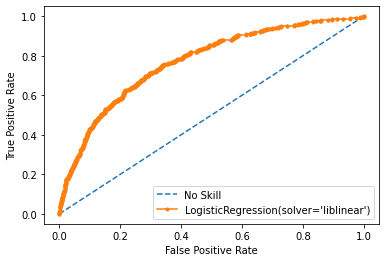

In [40]:
logic = LogisticRegression(solver='liblinear')
logic.fit(X_train,y_train)
pred_log=logic.predict(X_test)
rsc_log=logic.score(X_test,y_test)
acc_log=accuracy_score(y_test, pred_log)
rec_log=recall_score(y_test, pred_log, average='weighted')
f1_log=f1_score(y_test, pred_log, average='weighted')
prec_log=precision_score(y_test, pred_log)
print('Score of Model for Test Dataset : ',rsc_log)
print('Accuracy : ',acc_log)
print('Recall : ',rec_log)
print('F1-score : ',f1_log)
print('Precision : ',prec_log)
print('Confusion Matrix :\n',confusion_matrix(y_test,pred_log))
roc(logic)

### Naive-Bayes

Score of Model for Test Dataset :  0.8008
Accuracy :  0.8008
Recall :  0.8008
F1-score :  0.791212185171645
Precision :  0.5138539042821159
Confusion Matrix :
 [[1798  193]
 [ 305  204]]
No Skill: ROC AUC=0.500
Model: ROC AUC=0.782


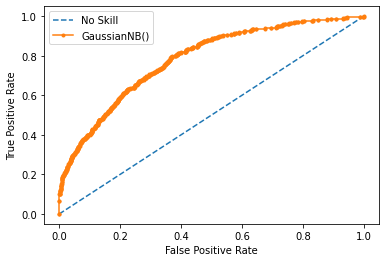

In [41]:
naive = GaussianNB()
naive.fit(X_train,y_train)
pred_nb=naive.predict(X_test)
rsc_nb=naive.score(X_test,y_test)
acc_nb=accuracy_score(y_test, pred_nb)
rec_nb=recall_score(y_test, pred_nb, average='weighted')
f1_nb=f1_score(y_test, pred_nb, average='weighted')
prec_nb=precision_score(y_test, pred_nb)
print('Score of Model for Test Dataset : ',rsc_nb)
print('Accuracy : ',acc_nb)
print('Recall : ',rec_nb)
print('F1-score : ',f1_nb)
print('Precision : ',prec_nb)
print('Confusion Matrix :\n',confusion_matrix(y_test,pred_nb))
roc(naive)

### DecisionTreeClassifier

Score of Model for Test Dataset :  0.856
Accuracy :  0.856
Recall :  0.856
F1-score :  0.8418394165704925
Precision :  0.7411003236245954
Confusion Matrix :
 [[1911   80]
 [ 280  229]]
No Skill: ROC AUC=0.500
Model: ROC AUC=0.825


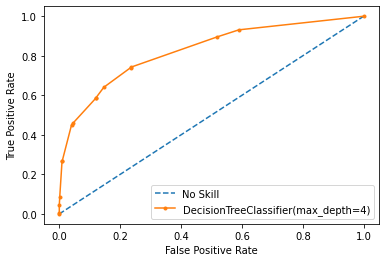

In [42]:
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train,y_train)
pred_dt=dtc.predict(X_test)
rsc_dt=dtc.score(X_test,y_test)
acc_dt=accuracy_score(y_test, pred_dt)
rec_dt=recall_score(y_test, pred_dt, average='weighted')
f1_dt=f1_score(y_test, pred_dt, average='weighted')
prec_dt=precision_score(y_test, pred_dt)
print('Score of Model for Test Dataset : ',rsc_dt)
print('Accuracy : ',acc_dt)
print('Recall : ',rec_dt)
print('F1-score : ',f1_dt)
print('Precision : ',prec_dt)
print('Confusion Matrix :\n',confusion_matrix(y_test,pred_dt))
roc(dtc)

GridSearchCV

In [30]:
model=DecisionTreeClassifier()
hyperparameters={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,8]}
clf=GridSearchCV(model,hyperparameters,n_jobs=-1,cv=5)
clf.fit(X_train,y_train)
params=clf.best_params_
score=clf.best_score_
print('Best suited parameters for DecisionTreeClassifier model : ',params)
print('Best possible score for the model : ',score)

Best suited parameters for DecisionTreeClassifier model :  {'criterion': 'gini', 'max_depth': 6}
Best possible score for the model :  0.8550666666666666


Model using Best Parameters

Score of Model for Test Dataset :  0.8648
Accuracy :  0.8648
Recall :  0.8648
F1-score :  0.8538553018481146
Precision :  0.7537091988130564
Confusion Matrix :
 [[1908   83]
 [ 255  254]]
No Skill: ROC AUC=0.500
Model: ROC AUC=0.849


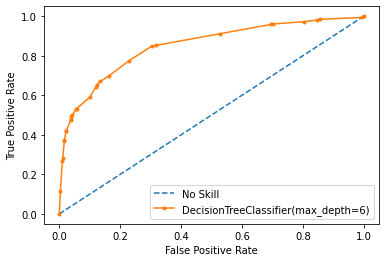

In [43]:
dtc = DecisionTreeClassifier(max_depth=6,criterion='gini')
dtc.fit(X_train,y_train)
pred_dt=dtc.predict(X_test)
rsc_dt=dtc.score(X_test,y_test)
acc_dt=accuracy_score(y_test, pred_dt)
rec_dt=recall_score(y_test, pred_dt, average='weighted')
f1_dt=f1_score(y_test, pred_dt, average='weighted')
prec_dt=precision_score(y_test, pred_dt)
print('Score of Model for Test Dataset : ',rsc_dt)
print('Accuracy : ',acc_dt)
print('Recall : ',rec_dt)
print('F1-score : ',f1_dt)
print('Precision : ',prec_dt)
print('Confusion Matrix :\n',confusion_matrix(y_test,pred_dt))
roc(dtc)

### RandomForestClassifier

Score of Model for Test Dataset :  0.8552
Accuracy :  0.8552
Recall :  0.8552
F1-score :  0.8297663980303481
Precision :  0.855072463768116
Confusion Matrix :
 [[1961   30]
 [ 332  177]]
No Skill: ROC AUC=0.500
Model: ROC AUC=0.860


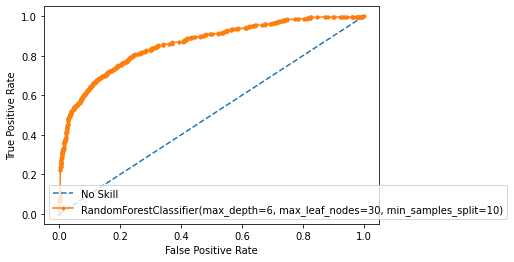

In [44]:
rfc = RandomForestClassifier(max_depth=6,min_samples_split=10,max_leaf_nodes=30)
rfc.fit(X_train,y_train)
pred_rf=rfc.predict(X_test)
rsc_rf=rfc.score(X_test,y_test)
acc_rf=accuracy_score(y_test, pred_rf)
rec_rf=recall_score(y_test, pred_rf, average='weighted')
f1_rf=f1_score(y_test, pred_rf, average='weighted')
prec_rf=precision_score(y_test, pred_rf)
print('Score of Model for Test Dataset : ',rsc_rf)
print('Accuracy : ',acc_rf)
print('Recall : ',rec_rf)
print('F1-score : ',f1_rf)
print('Precision : ',prec_rf)
print('Confusion Matrix :\n',confusion_matrix(y_test,pred_rf))
roc(rfc)

# Compare all the Models

In [33]:
compare = pd.DataFrame({'Model':['Logistic','Naive-Bayes','DecisionTree','RandomForest']
                           ,'Score':[rsc_log,rsc_nb,rsc_dt,rsc_rf]
                           ,'Accuracy':[acc_log,acc_nb,acc_dt,acc_rf]
                           ,'Recall':[rec_log,rec_nb,rec_dt,rec_rf]
                           ,'F1':[f1_log,f1_nb,f1_dt,f1_rf]
                           ,'Precision':[prec_log,prec_nb,prec_dt,prec_rf]})

In [45]:
compare

,Model,Score,Accuracy,Recall,F1,Precision
0,Logistic,0.81,0.81,0.81,0.77,0.59
1,Naive-Bayes,0.80,0.80,0.80,0.79,0.51
2,DecisionTree,0.86,0.86,0.86,0.85,0.75
3,RandomForest,0.85,0.85,0.85,0.83,0.86


**From the chosen models RandomForestClassifier has the highest accuracy and precision.**

### LazyClassifier

In [35]:
lr=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=lr.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [00:16<00:00,  1.72it/s]


In [36]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.86,0.74,0.74,0.86,0.43
RandomForestClassifier,0.87,0.74,0.74,0.86,1.05
LGBMClassifier,0.86,0.74,0.74,0.85,0.25
XGBClassifier,0.85,0.73,0.73,0.85,0.83
BaggingClassifier,0.85,0.72,0.72,0.84,0.31
ExtraTreesClassifier,0.86,0.72,0.72,0.85,0.77
DecisionTreeClassifier,0.80,0.71,0.71,0.80,0.09
SVC,0.86,0.70,0.70,0.84,1.80
LabelPropagation,0.80,0.69,0.69,0.80,3.11


**Using LazyClassifier it is verified that from our models RandomForestClassifier is the best for our problem at hand.**



---



---

